# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Projeto 8</font>
## <font color='blue'>Engenharia de Atributos em Dados Médicos - Parte 2</font>

![title](imagens/Projeto8.png)

## Instalando e Carregando os Pacotes

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Análise Exploratória

> Estamos importando o dataset gerado ao final da Parte 1 do Projeto 8.

In [ ]:
# Carregando os dados
dados = pd.read_csv("dados/dados_parte1.csv")

In [3]:
# Visualizando os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99,-99,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99,-99,0,1,0,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99,-99,1,1,0,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99,-99,1,1,0,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,1,3,0,1


In [4]:
# Shape
dados.shape

(68629, 24)

In [5]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68629 entries, 0 to 68628
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              68629 non-null  int64 
 1   patient_nbr               68629 non-null  int64 
 2   race                      68629 non-null  object
 3   gender                    68629 non-null  int64 
 4   age                       68629 non-null  object
 5   admission_type_id         68629 non-null  object
 6   discharge_disposition_id  68629 non-null  object
 7   admission_source_id       68629 non-null  object
 8   time_in_hospital          68629 non-null  int64 
 9   num_lab_procedures        68629 non-null  int64 
 10  num_procedures            68629 non-null  int64 
 11  num_medications           68629 non-null  int64 
 12  number_outpatient         68629 non-null  int64 
 13  number_emergency          68629 non-null  int64 
 14  number_inpatient      

#### 1- Total de Medicamentos Consumidos Por Faixa Etária

> A faixa etária de pacientes entre 70-80 é a que mais consome medicamentos.

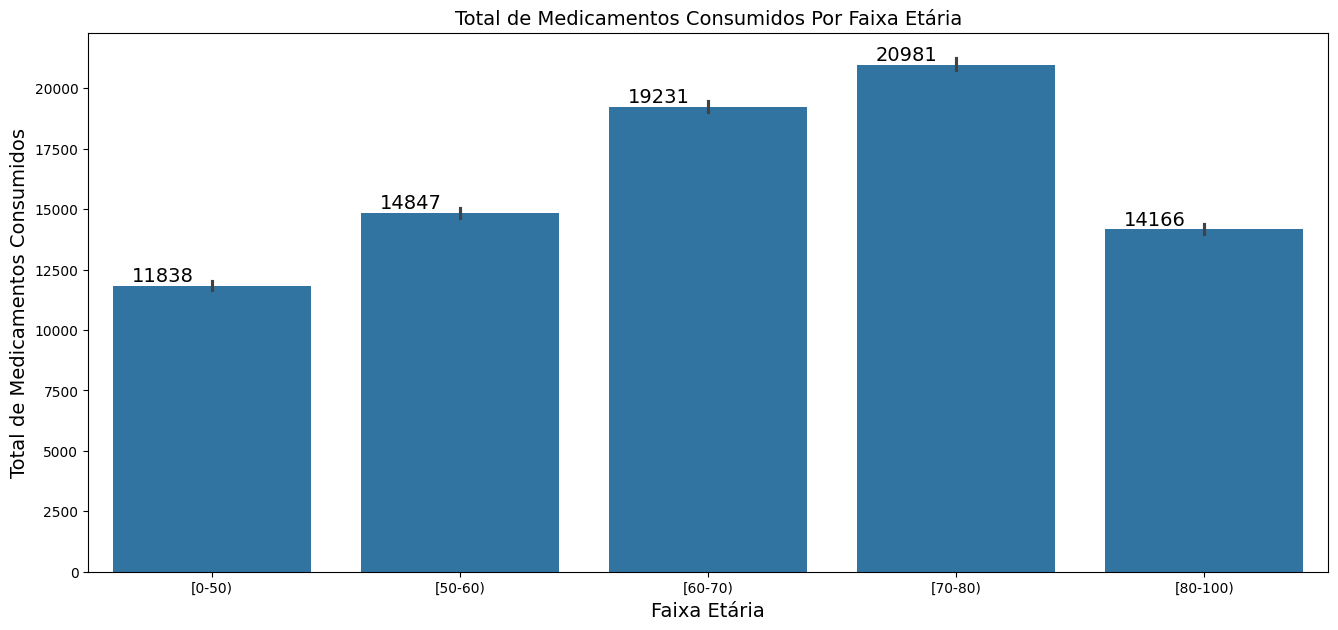

In [6]:
# Tamanho da figura
plt.figure(figsize = (16,7))

# Criação do gráfico de barras
figx = sns.barplot(x = 'age', y = 'num_med', estimator = np.sum, data = dados)

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Medicamentos Consumidos", fontsize = 14, color = 'black')

# Título
plt.title("Total de Medicamentos Consumidos Por Faixa Etária", fontsize = 14, color = 'black')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

# Mostra o gráfico
plt.show()

#### 2- Total de Readmissões de Pacientes Diabéticos Por Gênero

> Pacientes do sexo feminino tem número maior de readmissões.

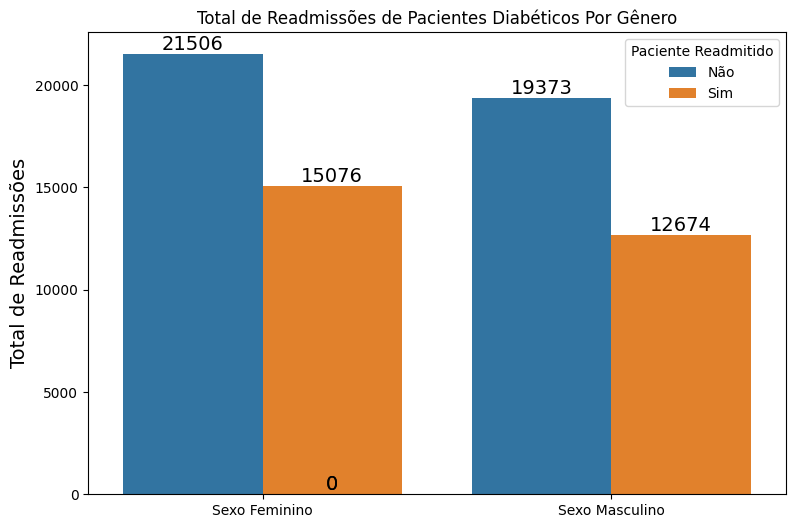

In [7]:
# Criação do gráfico de barras com label encoding
figx = sns.countplot(x = [('Sexo Feminino' if x == 0 else 'Sexo Masculino') for x in dados['gender']], 
                     hue = 'readmitted', 
                     data = dados) 

# Tamanho da figura em polegadas
figx.figure.set_size_inches(9,6)

# Legenda
figx.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
figx.axes.set_title('Total de Readmissões de Pacientes Diabéticos Por Gênero')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')
    
# Mostra o gráfico
plt.show()

#### 3- Total de Readmissões de Pacientes Por Faixa Etária

> A faixa etária de pacientes entre 70-80 é a que tem o maior número de readmissões.

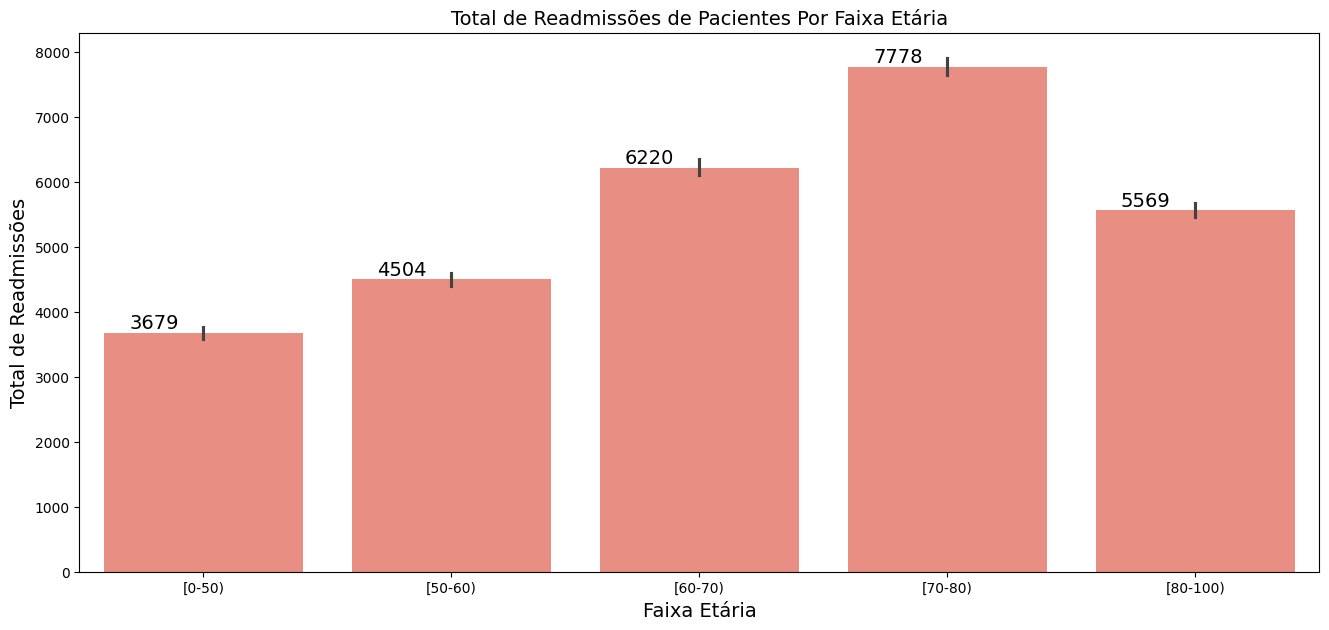

In [8]:
# Tamanho da figura
plt.figure(figsize = (16,7))

# Criação do gráfico de barras 
figx = sns.barplot(x = 'age', y = 'readmitted', estimator = np.sum, data = dados, color = 'salmon')

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
plt.title("Total de Readmissões de Pacientes Por Faixa Etária", fontsize = 14, color = 'black')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

# Mostra o gráfico
plt.show()